In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc_score
import joblib as jl
from sklearn.metrics import accuracy_score


In [42]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\AI PROJECT\diabetes.csv")
data.head(5)
# data.isnull().sum()
# pd.read_csv?  # it helps to know about parameters of this function
# data.shape  # it returns the total number of rows and columns in the form (rows, columns)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# data.info()  # not null means no row contains missing values
data.isnull().sum()  # getting missing values sum


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
# data.isna().any()
non_acceptable_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in non_acceptable_zero:
    data[col].replace(0, np.nan, inplace=True)

# data.head(10)  # to check if 0 is replaced with NaN


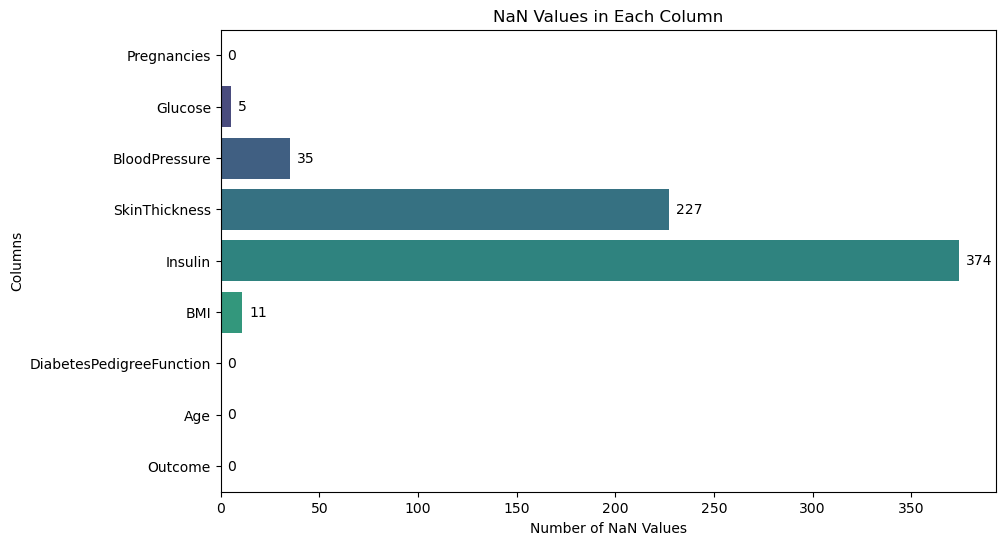

In [45]:

# data.head(10)  # to check if 0 is replaced with NaN
# Plotting graph to visualize NaN or Null data
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=data.isna().sum(), y=data.columns, palette="viridis")  # You can choose a different palette

# Adding annotations to the bars
for p in barplot.patches:
    barplot.annotate(text=f"{p.get_width():.0f}", 
                     xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', 
                     ha="left", va="center")

# Setting plot labels and title
plt.xlabel("Number of NaN Values")
plt.ylabel("Columns")
plt.title("NaN Values in Each Column")

# Displaying the plot
plt.show()


In [46]:
data.head(5) #before replacing 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [47]:
data.groupby('Outcome').mean() # calcuate mean for all row in value 0 & 1 ,
#after replacing mean run groupby again and you will see mean of insulin and other replacement will change drastically
#use can also use describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [48]:
# Filling NaN values with the mean of each column
data_filled = data.fillna(data.mean())

# Displaying the updated DataFrame
print(data_filled)


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [49]:
data.head(5) #after replacing 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [50]:
data.describe() #'give statistical measure like count , mean , min etc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
data['Outcome'].value_counts() #count values of 0 and 1 in outcome , 1 is diabetes +

0    500
1    268
Name: Outcome, dtype: int64

In [52]:
data.groupby('Outcome').mean() # calcuate mean for all row in value 0 & 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [53]:
# Filling NaN values with the mean of each column
data_filled = data.fillna(data.mean())

# Splitting test and train data
X = data_filled.drop(columns='Outcome', axis=1)
Y = data_filled['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state=3)


#         Prediction Algorithms 
##       Random Forest Algorithms 
### Method 1 -Using Random Forest Classifier

In [54]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier
RFClassifierModel = RandomForestClassifier(random_state=16)
RFClassifierModel.fit(X_train, Y_train)

RandomForestClassifier(random_state=16)

In [55]:
# Assuming you have already trained your RFClassifierModel
# If not, you should train it before making predictions

# Training accuracy
train_accuracy = RFClassifierModel.score(X_train, Y_train)

# Testing accuracy
test_accuracy = RFClassifierModel.score(X_test, Y_test)

print(f'Training data Accuracy: {train_accuracy*100:.2f}%')
print(f'Test data Accuracy: {test_accuracy*100:.2f}%')


Training data Accuracy: 100.00%
Test data Accuracy: 80.67%


### Method 2 - Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
RFRegressorModel = RandomForestRegressor(random_state=26)
RFRegressorModel.fit(X_train, Y_train)

RandomForestRegressor(random_state=26)

In [59]:

X_train_predict = RFRegressorModel.predict(X_train)
train_accuracy = accuracy_score( np.round(abs(X_train_predict)), Y_train )
X_test_predict = RFRegressorModel.predict(X_test)
test_accuracy = accuracy_score(np.round(abs(X_test_predict)) ,Y_test)

print(f'Training data Accuracy: {train_accuracy*100:.2f}%')
print(f'Test data Accuracy: {test_accuracy*100:.2f}%')

Training data Accuracy: 100.00%
Test data Accuracy: 81.04%


### Storing Both Models in Pickle File so that the trained model can be used directly

In [61]:
jl.dump(RFClassifierModel,'RFClassifierDiabetes.pkl')

['RFClassifierDiabetes.pkl']

In [62]:
jl.dump(RFRegressorModel ,'RFRegressorDiabetes.pkl')

['RFRegressorDiabetes.pkl']

# Making Prediction

In [63]:
RFClassifierDiabetes=jl.load('RFClassifierDiabetes.pkl')
RFRegressorDiabetes=jl.load('RFRegressorDiabetes.pkl')
input_data = (4,84,90,23,56,39.5,0.159,25)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [65]:
PredictModelRFC = RFClassifierDiabetes.predict(input_data_reshaped)
PredictModelRFR = RFRegressorDiabetes.predict(input_data_reshaped)

print(PredictModelRFC[0])
if (PredictModelRFC[0]== 0):
    print('Not Diabetic')
else:
    print('Diabetic')

print(PredictModelRFR[0])
print('Possiblility : ',PredictModelRFR[0]*100 ,'%')

0
Not Diabetic
0.06
Possiblility :  6.0 %


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
